**Sergio**  
#     <center>   Proyecto 2: <font color=blue>Pandas Project</font></center></h1><center><img src=https://animals.sandiegozoo.org/sites/default/files/styles/image_grid_full_width/public/2017-04/%20leopard_shark_01.jpg style="width: 500px;">


#  Conociendo los datos
Objetivo:
- Conocer la cantidad de valores del df, analizar las columnas, observar errores y empezar a pensar en soluciones.


## Importamos bibliotecas y abrimos el archivo

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("data/GSAF5.csv",encoding="ISO-8859-1")

## Informacion inicial del archivo

### Observacion inicial del dataset 

In [3]:
#Cantidad de filas y de columnas
df.shape

(5992, 24)

In [4]:
#Vamos a ver si hay algun duplicado en los valores
df.duplicated().value_counts()

False    5992
dtype: int64

In [5]:
#Observamos las primeras 10 lineas
df.head(10)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN
5,2016.09.15.R,15-Sep-16,2016,Boat,AUSTRALIA,Western Australia,Bunbury,Fishing,Occupant: Ben Stratton,NaN,...,NaN,"West Australian, 9/15/2016",2016.09.15.R-boat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.15.R,2016.09.15.R,5988,NaN,NaN
6,2016.09.11,11-Sep-16,2016,Unprovoked,USA,Florida,"Ponte Vedra, St. Johns County",Wading,male,M,...,3' to 4' shark,"News4Jax, 9/11/2016",2016.09.11-PonteVedra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.11,2016.09.11,5987,NaN,NaN
7,2016.09.07,07-Sep-16,2016,Unprovoked,USA,Hawaii,"Makaha, Oahu",Swimming,female,F,...,"Tiger shark, 10?","Hawaii News Now, 9/7/2016",2016.09.07-Oahu.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.07,2016.09.07,5986,NaN,NaN
8,2016.09.06,06-Sep-16,2016,Unprovoked,NEW CALEDONIA,North Province,Koumac,Kite surfing,David Jewell,M,...,NaN,"TVANouvelles, 9/6/2016",2016.09.06-Jewell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.06,2016.09.06,5985,NaN,NaN
9,2016.09.05.b,05-Sep-16,2016,Unprovoked,USA,South Carolina,"Kingston Plantation, Myrtle Beach, Horry County",Boogie boarding,Rylie Williams,F,...,NaN,"C. Creswell, GSAF",2016.09.05.b-Williams.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.05.b,2016.09.05.b,5984,NaN,NaN


In [6]:
#Valores nulos
df.isna().sum()

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
pdf                          0
href formula                 1
href                         3
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64

In [7]:
#Analisis de las columnas: cantidad de nulos y el tipo de datos de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5992 entries, 0 to 5991
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case Number             5992 non-null   object
 1   Date                    5992 non-null   object
 2   Year                    5992 non-null   int64 
 3   Type                    5992 non-null   object
 4   Country                 5949 non-null   object
 5   Area                    5590 non-null   object
 6   Location                5496 non-null   object
 7   Activity                5465 non-null   object
 8   Name                    5792 non-null   object
 9   Sex                     5425 non-null   object
 10  Age                     3311 non-null   object
 11  Injury                  5965 non-null   object
 12  Fatal (Y/N)             5973 non-null   object
 13  Time                    2779 non-null   object
 14  Species                 3058 non-null   object
 15  Inve

### Conclusiones iniciales tras el analisis inicial:


- Topic: Ataques de tiburon en el mundo
- Tamaño: 5992 filas y 24 columnas
- Varias columnas parece que los datos van en la misma direccion y se solapan:
    - Case number (0,19,20) y original order: Comprobar diferencias y si son iguales borrar
    - Se solapan las columnas Year y Date: Agruparla en una.
    - En algunos casos los datos de la columna nombre se solapan con el sexo: Buscar solucion
    - Las columnas pdf, href formula y href se solapan, intentar agrupar en una
    - original order posible indice

#  Modificacion del dataset

Objetivo:
- Analizar los valores de cada columna, eliminar los valores nulos, los errores humanos y ver su utilidad practica.

## Modificaciones ordenado por columna

### Columna: "original order","Case Number","Case Number.1","Case Number.2"

- La columna original order es un indice de casos en los que se repiten valores igual que las columnas Case Number
- Objetivo: Unica lista de numero de casos: lista con valores unicos y continuos
- Output: Nueva columna que usare de indice


In [8]:
#primer vistazo de las cuatro columnas juntas
df[["original order","Case Number","Case Number.1","Case Number.2"]]

,original order,Case Number,Case Number.1,Case Number.2
0,5993,2016.09.18.c,2016.09.18.c,2016.09.18.c
1,5992,2016.09.18.b,2016.09.18.b,2016.09.18.b
2,5991,2016.09.18.a,2016.09.18.a,2016.09.18.a
3,5990,2016.09.17,2016.09.17,2016.09.17
4,5989,2016.09.15,2016.09.16,2016.09.15
...,...,...,...,...
5987,6,ND.0005,ND.0005,ND.0005
5988,5,ND.0004,ND.0004,ND.0004
5989,4,ND.0003,ND.0003,ND.0003
5990,3,ND.0002,ND.0002,ND.0002


#### Analisis de original order

In [9]:
#ordeno la tabla por los valores original order
df.sort_values("original order",ascending=True,inplace=True)
df.head(3)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
5991,ND.0001,1845-1853,0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,...,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2,NaN,NaN
5990,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3,NaN,NaN
5989,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4,NaN,NaN


In [10]:
#Vamos a ver que valoers faltan
df["original order"].nunique()

5988

In [11]:
#Vamos a comprobar cuantos valores se repiten 
OE_ValoresRepetidos=len(df["original order"])-df["original order"].nunique()

In [12]:
#Comprobamos QUE valores se repiten
df["original order"].value_counts().head(OE_ValoresRepetidos)

5739    2
569     2
5661    2
3847    2
Name: original order, dtype: int64

In [13]:
#Comprobamos desde el 0 al numero de casos, que valores no estan, lopaso a index ya que me resuta mas facil
df2=df.set_index("original order")
for i in range(0,len(df2)):
    try:
        df2.loc[i]
    except KeyError:
        print(i)

0
1
571
3347
5724
5881


- Los casos iguales podrian ser casos repetidos o error al introducir el valor original order

In [14]:
#Elegimos dos casos con mismo original order y comparamos el resto de columnas de los casos y comparamos si e
df.loc[5423]==df.loc[5424]
#Muy pocas se parecen

Case Number               False
Date                      False
Year                       True
Type                       True
Country                   False
Area                      False
Location                  False
Activity                  False
Name                      False
Sex                        True
Age                       False
Injury                     True
Fatal (Y/N)                True
Time                      False
Species                   False
Investigator or Source    False
pdf                       False
href formula              False
href                      False
Case Number.1             False
Case Number.2             False
original order             True
Unnamed: 22               False
Unnamed: 23               False
dtype: bool

Problema de original order: 4 numeros repetidos y en el orden de casos se han saltado varios numeros
Opciones para corregirlo:
- Opcion A: Cambios en la misma columna:
        - del 2 al 568 correcto, pasamos el segundo valor 569 al 570 
        - del 571 al 3346 correcto, del3348 al primer valor 3847 hay que restarle 1
        - del 3848 al 5660 correcto, del segundo valor del 5661 a 5723 hay que sumarle 1
        - del 5725 a 5738 correcto, del segundo valor de 5739 al 5880 hay que sumarle 1
        - despues restamos 1 a todo y los casos empezaran desde 1 siendo valores unicos
- Opcion B:
        - ponerlo en orden y crear una nueva tabla con un rango de 1 a len

In [15]:
#cambio el indice con una lista de numeros desde el 1 hasta la longitud +1
lista=[i for i in range(1,len(df)+1)]


In [16]:
# añado la columna nueva y borro la antigua
df["Casos"]=lista
df.drop("original order",axis=1,inplace=True)

#### Analisis Case Number

In [17]:
#Cambio el indice a original a Casos 
df=df.set_index("Casos")

In [18]:
#Miramos cantidad de valores nulos
df[["Case Number","Case Number.1","Case Number.2"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5992 entries, 1 to 5992
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Case Number    5992 non-null   object
 1   Case Number.1  5992 non-null   object
 2   Case Number.2  5992 non-null   object
dtypes: object(3)
memory usage: 187.2+ KB


In [19]:
#Valores unicos que hay
df[["Case Number","Case Number.1","Case Number.2"]].nunique()

Case Number      5976
Case Number.1    5975
Case Number.2    5976
dtype: int64

In [20]:
#No hay valores nulos pero hay valores que se repiten y el formato de numero de caso varia
print(f'{len(df["Case Number"])-len(set(df["Case Number"]))} casos se repiten')

16 casos se repiten


In [21]:
#Vamos a ver que valores se repiten en Case Number y si son los mismos en 
listaA=[] #Lista de valores unicos de Case Number
listaB=[] #Lista de valores repetidos de Case Number
for i in range(1,len(df)+1):
    if df["Case Number"].loc[i] not in listaA:
        listaA.append(df["Case Number"].loc[i])
    else:
        listaB.append(df["Case Number"].loc[i])

In [22]:
#Vamos a ver que valores se repiten en Case Number.1 y si son los mismos en 
listaC=[] #Lista de valores unicos de Case Number.1
listaD=[] #Lista de valores repetidos de Case Number.1
for i in range(1,len(df)+1):
    if df["Case Number.1"].loc[i] not in listaC:
        listaC.append(df["Case Number.1"].loc[i])
    else:
        listaD.append(df["Case Number.1"].loc[i])

In [23]:
#Vamos a ver que valores se repiten en Case Number.2 y si son los mismos en 
listaE=[] #Lista de valores unicos de Case Number.2
listaF=[] #Lista de valores repetidos de Case Number.2
for i in range(1,len(df)+1):
    if df["Case Number.2"].loc[i] not in listaE:
        listaE.append(df["Case Number.2"].loc[i])
    else:
        listaF.append(df["Case Number.2"].loc[i])

In [24]:
#Vamos a comprobar que columnas son mas parecidas
print((df["Case Number"]==df["Case Number.1"]).value_counts())
print((df["Case Number.1"]==df["Case Number.2"]).value_counts())
print((df["Case Number"]==df["Case Number.2"]).value_counts())

True     5979
False      13
dtype: int64
True     5981
False      11
dtype: int64
True     5990
False       2
dtype: int64


In [25]:
#Primero unificare la columna Case Number con la columna Case Number.2 ya que son muy parecidas
print(f'Valores no repetidos {listaA==listaE}')
print(f'Valores  repetidos {listaB==listaF}')


Valores no repetidos False
Valores  repetidos True


In [26]:
#Los dos valores que no coinciden estan en los valores no repetidos
for i in range(1,len(df)):
    if df["Case Number"].loc[i]!= df["Case Number.2"].loc[i]:
          print(i)
    


1273
5823


In [27]:
#Analizamos ambos valores de forma individual
df.loc[1273]

Case Number                                                    1934.01.08.R
Date                                                   Reported 08-Feb-1934
Year                                                                   1934
Type                                                                Boating
Country                                                              TURKEY
Area                                                               Istanbul
Location                                         Haydarpasa jetty, Istanbul
Activity                                                            Fishing
Name                                                                2 males
Sex                                                                       M
Age                                                                     NaN
Injury                                                            No injury
Fatal (Y/N)                                                               N
Time        

In [28]:
df.loc[5823]

Case Number                                                      2015.07-10
Date                                                              10-Jul-15
Year                                                                   2015
Type                                                             Unprovoked
Country                                                                 USA
Area                                                             California
Location                                    Huntington Beach, Orange County
Activity                                                            Surfing
Name                                                           Danny Miskin
Sex                                                                       M
Age                                                                      38
Injury                              No injury, shark bumped & damaged board
Fatal (Y/N)                                                               N
Time        

- Problema:  
     - Case Number: A veces apuntdo por fecha o por el nombre del pdf, valores repetidos y si son el mismo dia con letras, no da informacion relevante ni utilizable ya que son parches de otras columnas

Decido borrar las columnas Case number ya que no me aportan informacion relevante y lo he unido a la columna Casos

#### Output Columnas: "original order","Case Number","Case Number.1","Case Number.2"

In [29]:
# Solo mantengo una columna de numero de caso que va a ser la columna Casos
df.drop(["Case Number","Case Number.1","Case Number.2"],axis=1,inplace=True)

### Columna "unname 23"

####   analisis de los valores y conocimiento del problema

In [30]:
#Vistazo de la columna Unname 23
df["Unnamed: 23"].sample(n=5)

Casos
4692    NaN
2617    NaN
2199    NaN
2684    NaN
2373    NaN
Name: Unnamed: 23, dtype: object

In [31]:
#Valores nulos de Unnamed 23
df["Unnamed: 23"].isna().sum()

5990

In [32]:
#Valores de Unnamed 23
set(df["Unnamed: 23"])

{'Teramo', 'change filename', nan}

In [33]:
#Cantidad de veces que salen estos valores
df["Unnamed: 23"].value_counts()

change filename    1
Teramo             1
Name: Unnamed: 23, dtype: int64

#### Conclusion y output

In [34]:
# No la considero relevante asi que decido borrarla
df.drop("Unnamed: 23",axis=1,inplace=True)

### Columna "unname 22"

#### Identificacion de valores nulos de cada columna

In [35]:
#Vistazo de la columna Unname 22
df["Unnamed: 22"].sample(n=5)

Casos
3209    NaN
5941    NaN
3327    NaN
1101    NaN
5909    NaN
Name: Unnamed: 22, dtype: object

In [36]:
#Valores nulos de Unnamed 22
df["Unnamed: 22"].isna().sum()

5991

In [37]:
#Valores de Unnamed 22
set(df["Unnamed: 22"])

{nan, 'stopped here'}

In [38]:
#Vamos a ver cuantos valores hay
df["Unnamed: 22"].value_counts()

stopped here    1
Name: Unnamed: 22, dtype: int64

#### Conclusion y output

In [39]:
#El registro esta en mitad de la tabla y no lo considero importante asi que quito toda la columna 
df.drop("Unnamed: 22", axis=1,inplace=True)

###  Columnas: "Country"  

#### Analisis inicial de las columnas

In [40]:
#Vistazo de la columna Country
df["Country"].sample(n=5)

Casos
4211      AUSTRALIA
3193        ENGLAND
5099      AUSTRALIA
5369        REUNION
683     PHILIPPINES
Name: Country, dtype: object

In [41]:
#Observamos la cantidad de valores nulos que hay
(df["Country"]).isna().sum()

43

In [42]:
#Hay muy pocos valores nulos, los relleno con la categoria "No determinado"
df["Country"].fillna("No determinado",inplace=True)

####  Limpieza de los valores:
Observo que en los inicios hay espacios, hay ?, primero limpiar los nombres y despues buscar si existe el pais
Objetivo: comprobar si existen y si no existen añadir como No determinado, antes borrar espacios iniciales y finales y quitar ?¿ç

In [43]:
#Primero lo convierto todo a mayusculas
df["Country"]=df["Country"].str.upper()


In [44]:
#Identifico los paises que empiezan con espacio y se lo quito
df[df["Country"].str.startswith(" ")]["Country"]
#Solo son PHILIPPINES Y TONGA, los modifico 
df.replace({" PHILIPPINES":"PHILIPPINES"," TONGA":"TONGA"},inplace=True)

In [45]:
#Identifico los paises que acaban con espacio y se lo quito
df[df["Country"].str.endswith(" ")]["Country"]
df.replace({"YEMEN ":"YEMEN",
            "EGYPT ":"EGYPT",
           "NORTH ATLANTIC OCEAN ":"NORTH ATLANTIC OCEAN",
           "NICARAGUA ":"NICARAGUA",
            "PACIFIC OCEAN ":"PACIFIC OCEAN",
            "MEXICO ":"MEXICO"
           },inplace=True)

In [46]:
#Identifico los valores que tienen ? y los modifico
for i in df["Country"]:
    if re.findall("[?]",i):
        print(i)

ASIA?
RED SEA?
INDIAN OCEAN?
MEDITERRANEAN SEA?
SUDAN?


In [47]:
#Los sustitutyo
df.replace({"ASIA?":"ASIA",
            "RED SEA?":"RED SEA",
            "INDIAN OCEAN?":"INDIAN OCEAN",
            "MEDITERRANEAN SEA?":"MEDITERRANEAN SEA",
           "SUDAN?":"SUDAN"},inplace=True)

####  Conclusion: Clasificacion por paises existentes
los nombres de los paises ya estan limpios, vamos a comprobar si existen 
[Github del csv](https://github.com/datasets/country-list/blob/master/data.csv#L119)

In [48]:
'''Descargo de github un csv con todos los paises del mundo en ingles, 
viene con indice y codigo asi que creo una lista con los paises'''
lista_paises=pd.read_csv("paises.csv")
lista_paises=list(lista_paises["Name"])

In [49]:
#Convierto los nombres a mayuscula y los pongo en una lista
lista=[]
for i in lista_paises:
    lista.append(i.upper())
lista_paises=lista

In [50]:
#Vamos a ver los paises que no identifica para ver cuales podemos solucionar y cuales no
for i in set(df["Country"]):
    if i in list(lista_paises):
        continue
    else:
        print(i)

EGYPT / ISRAEL
EQUATORIAL GUINEA / CAMEROON
VIETNAM
COAST OF AFRICA
MEDITERRANEAN SEA
NORTH SEA
NORTHERN ARABIAN SEA
SCOTLAND
PALESTINIAN TERRITORIES
ENGLAND
BURMA
TASMAN SEA
KOREA
ADMIRALTY ISLANDS
NETHERLANDS ANTILLES
UNITED ARAB EMIRATES (UAE)
SOUTH ATLANTIC OCEAN
NEW GUINEA
BRITISH WEST INDIES
ST HELENA
NORTH ATLANTIC OCEAN
BRITISH ISLES
WESTERN SAMOA
PERSIAN GULF
CARIBBEAN SEA
GRAND CAYMAN
ANTIGUA
BAY OF BENGAL
RUSSIA
CURACAO
SOUTHWEST PACIFIC OCEAN
CENTRAL PACIFIC
FALKLAND ISLANDS
RED SEA / INDIAN OCEAN
JOHNSTON ISLAND
TURKS & CAICOS
FEDERATED STATES OF MICRONESIA
OCEAN
ANDAMAN / NICOBAR ISLANDAS
ST. MAARTIN
AZORES
IRAN / IRAQ
NEW BRITAIN
BRITISH NEW GUINEA
TRINIDAD & TOBAGO
NEVIS
PACIFIC OCEAN
GULF OF ADEN
SOUTH CHINA SEA
BAHREIN
NO DETERMINADO
ST. MARTIN
SAN DOMINGO
OKINAWA
REUNION
ITALY / CROATIA
MID ATLANTIC OCEAN
INDIAN OCEAN
COLUMBIA
JAVA
ATLANTIC OCEAN
USA
SOLOMON ISLANDS / VANUATU
BRITISH VIRGIN ISLANDS
RED SEA
CEYLON (SRI LANKA)
MALDIVE ISLANDS
NORTH PACIFIC OCEAN
DIEGO 

**MODIFICACIONES sobre la lista de paises que no aparecen** {Como salen: Transformacion} (ND=no determinado)
1. CEYLON (SRI LANKA): SRI LANKA
1. MID-PACIFC OCEAN:ND
1. ASIA:ND
1.  PERSIAN GULF: ND
1.  SAN DOMINGO: DOMINICAN REPUBLIC
1.  NEW BRITAIN: ND
1.  TRINIDAD & TOBAGO: TRINIDAD AND TOBAGO
1.  NORTH SEA: ND
1.  UNITED ARAB EMIRATES (UAE): 'UNITED ARAB EMIRATES'
1.  SOUTH PACIFIC OCEAN: ND
1.  FALKLAND ISLANDS: 'FALKLAND ISLANDS (MALVINAS)'
1.  SOUTHWEST PACIFIC OCEAN: ND
1.  OKINAWA: JAPAN
1.  EQUATORIAL GUINEA / CAMEROON: ND
1.  BRITISH ISLES: ND
1.  NETHERLANDS ANTILLES: ND
1.  GULF OF ADEN: YEMEN
1.  BURMA: MYANMAR
1.  BRITISH NEW GUINEA: ND
1.  THE BALKANS: ND
1.  FEDERATED STATES OF MICRONESIA: MICRONESIA
1.  PACIFIC OCEAN: ND
1.  MEDITERRANEAN SEA: ND
1.  MALDIVE ISLANDS: MALDIVES
1.  ANDAMAN / NICOBAR ISLANDAS: INDIA
1.  TASMAN SEA: AUSTRALIA
1.  REUNION: FRANCE
1.  BAY OF BENGAL:INDIA
1.  BAHREIN: BAHRAIN
1.  ATLANTIC OCEAN: ND
1.  DIEGO GARCIA: ND
1.  TURKS & CAICOS: ND PERO MUY BONITO
1.  PALESTINIAN TERRITORIES: PALESTINE
1.  SYRIA: 'SYRIAN ARAB REPUBLIC'
1.  NO DETERMINADO
1.  JAVA: INDONESIA
1.  RUSSIA: RUSSIAN FEDERATION
1.  GRAND CAYMAN: CAYMAN ISLANDS'
1.  NEVIS: ND
1.  ST. MAARTIN: 'SAINT MARTIN (FRENCH PART)'
1.  JOHNSTON ISLAND: ND
1.  ST. MARTIN: 'SAINT MARTIN (FRENCH PART)'
1.  NORTH PACIFIC OCEAN: ND
1.  ENGLAND:'UNITED KINGDOM'
1.  ST HELENA: 'SAINT HELENA'
1.  ANTIGUA: 'ANTIGUA AND BARBUDA'
1.  NORTH ATLANTIC OCEAN: ND
1.  BRITISH WEST INDIES: ND
1.  AZORES: PORTUGAL
1.  IRAN / IRAQ: ND
1.  SCOTLAND: UNITED KINGDOM
1.  SOUTH ATLANTIC OCEAN: ND
1.  SOLOMON ISLANDS / VANUATU: ND
1.  SOUTH CHINA SEA: CHINA
1.  COLUMBIA: COLOMBIA
1.  RED SEA: ND
1.  BETWEEN PORTUGAL & INDIA: ND
1.  ADMIRALTY ISLANDS: ND
1.  WESTERN SAMOA: SAMOA
1.  CENTRAL PACIFIC: ND
1.  OCEAN: ND
1.  EGYPT / ISRAEL: ND
1.  COAST OF AFRICA: ND
1.  CRETE: GREECE
1.  ITALY / CROATIA: ND
1.  KOREA: ND
1.  VIETNAM: VIET NAM
1.  BRITISH VIRGIN ISLANDS: ND
1.  NORTHERN ARABIAN SEA: ND
1.  INDIAN OCEAN: ND
1.  USA: 'UNITED STATES'
1.  CARIBBEAN SEA: ND
1.  RED SEA / INDIAN OCEAN: ND
1.  NEW GUINEA: GUINEA
1.  CURACAO: BRAZIL
1.  MID ATLANTIC OCEAN: ND

In [51]:
#Hacemos las modificaciones en el dataset
df.replace({"CEYLON (SRI LANKA)": "SRI LANKA",
            "SAN DOMINGO": "DOMINICAN REPUBLIC",
            "TRINIDAD & TOBAGO": "TRINIDAD AND TOBAGO",
            "UNITED ARAB EMIRATES (UAE)": "UNITED ARAB EMIRATES",
           "FALKLAND ISLANDS": "FALKLAND ISLANDS (MALVINAS)",
            "OKINAWA": "JAPAN",
           "GULF OF ADEN": "YEMEN",
            "BURMA": "MYANMAR",
           "FEDERATED STATES OF MICRONESIA": "MICRONESIA",
            "MALDIVE ISLANDS": "MALDIVES",
           "ANDAMAN / NICOBAR ISLANDAS": "INDIA",
            "TASMAN SEA": "AUSTRALIA",
            "REUNION":"FRANCE",
            "BAY OF BENGAL":"INDIA",
            "BAHREIN":"BAHRAIN",
           "PALESTINIAN TERRITORIES":"PALESTINE",
            "SYRIA": 'SYRIAN ARAB REPUBLIC',
            "JAVA": "INDONESIA",
            "RUSSIA": "RUSSIAN FEDERATION",
            "GRAND CAYMAN": "CAYMAN ISLANDS",
            "ST. MAARTIN": 'SAINT MARTIN (FRENCH PART)',
            "ST. MARTIN": 'SAINT MARTIN (FRENCH PART)',
            "ENGLAND":'UNITED KINGDOM',
            "ST HELENA": 'SAINT HELENA',
            "ANTIGUA": 'ANTIGUA AND BARBUDA',
              "AZORES": "PORTUGAL",
            "SCOTLAND": "UNITED KINGDOM",
            "SOUTH CHINA SEA": "CHINA",
            "COLUMBIA": "COLOMBIA",
            "WESTERN SAMOA": "SAMOA",
            "CRETE": "GREECE",
            "VIETNAM": "VIET NAM",
            "USA": 'UNITED STATES',
            "NEW GUINEA": "GUINEA",
            "CURACAO": "BRAZIL"
            
           },inplace=True)

In [52]:
#Los paises que no estan bien escritos los añadimos a No determinado
for i in set(df["Country"]):
    if i in list(lista_paises):
        continue
    else:
        df.replace({i:"No determinado"},inplace=True)

In [53]:
#Comprobamos
df["Country"].value_counts()

UNITED STATES           2116
AUSTRALIA               1280
SOUTH AFRICA             565
No determinado           174
PAPUA NEW GUINEA         133
                        ... 
SYRIAN ARAB REPUBLIC       1
TUVALU                     1
DJIBOUTI                   1
SLOVENIA                   1
KUWAIT                     1
Name: Country, Length: 128, dtype: int64

### Columna: "Age"

#### Identificacion de valores nulos de cada columna

In [54]:
#Vistazo de la columna Age
df["Age"].sample(n=5)

Casos
86      NaN
1749    NaN
3942    NaN
4859     36
1810     34
Name: Age, dtype: object

In [55]:
#La mitad de los valores son nulos (mal empezamos)
df["Age"].isna().sum()

2681

In [56]:
df["Age"].value_counts()

17           148
18           145
19           138
20           136
15           135
            ... 
A.M.           1
adult          1
Both 11        1
18 months      1
60s            1
Name: Age, Length: 151, dtype: int64

#### Conclusion y output


In [57]:
#intento modificar los valores, primero relleno los na con 0
df["Age"].fillna("0",inplace=True)

In [58]:
#Creo una definicion que compruebe si la edad es unicamente numerica y el resto los cambio a 0
def edad(edad):
    try:
        edad==int(edad)
        if i!=0:
            return edad
    except ValueError:
        return 0

In [59]:
#Aplico la funcion
df["Age"]=df["Age"].apply(edad)

###  Columnas: "pdf","href formula","href"

Objetivo unificar las 3 columnas al pdf de esa columna

####  Analisis inicial

In [60]:
#Observamos las 3 columnas
df[["pdf","href formula","href"]]

,pdf,href formula,href
Casos,,,
1,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
2,ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
3,ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
4,ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
5,ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
...,...,...,...
5988,2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
5989,2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
5990,2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...


Href y Href formula parecen muy similares y el link te enlaca al pdf, en la columna pdf esta el nombre del pdf

In [61]:
#Vamos a comprobar los valores nulos de cada columna para elegir la que menos tenga
df[["pdf","href formula","href"]].isna().sum()

pdf             0
href formula    1
href            3
dtype: int64

In [62]:
#Vamos a ver cuantos valores de href y href formula coinciden
(df.href==df["href formula"]).value_counts()

True     5938
False      54
dtype: int64

In [63]:
#localizo el valor nulo de href formula
df["href formula"].isna().sort_values()

Casos
1       False
4000    False
3999    False
3998    False
3997    False
        ...  
1993    False
1992    False
1991    False
2000    False
2973     True
Name: href formula, Length: 5992, dtype: bool

In [64]:
#analizo
df.loc[2973]

Date                                                              19-Jan-75
Year                                                                   1975
Type                                                             Unprovoked
Country                                                           AUSTRALIA
Area                                                        South Australia
Location                                                         Coffin Bay
Activity                                                            Surfing
Name                                                        David Barrowman
Sex                                                                       M
Age                                                                      17
Injury                                            FATAL, body not recovered
Fatal (Y/N)                                                               Y
Time                                                                    NaN
Species     

#### Conclusion y output

Me quedo con la columna href formula que solo tiene un valor nulo, este valor nulo lo suplire por el valor de href de esa fila y borro las otras dos ya que el nombre del pdf no me aporta mucho

In [65]:
#añado el na de de href formula a la columna final
df["href formula"].at[2973]=df["href"].at[2973]

In [66]:
#elimino las columnas pdf y href 
df.drop(["pdf","href"],axis=1,inplace=True)

In [67]:
#cambio de nombre a la columna que guardo en el df
df.rename(columns={"href formula":"Pdf"},inplace=True)

###  Columnas: "species"

####   Analisis inicial

In [68]:
#Primero quito el espacio del titulo
df.columns=['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time','Species',
       'Investigator or Source', 'Pdf']

In [69]:
#Vistazo de la columna species
df["Species"].sample(n=5)

Casos
3840    White shark (tooth fragment recovered)
2271                                       NaN
2403                                       NaN
1275     3.4 m [11']  tiger shark & a 5' shark
4799                                       NaN
Name: Species, dtype: object

In [70]:
#Comprobamos cuantos valores na hay
df["Species"].isna().sum()

2934

In [71]:
# Cuantas categorias de especies diferentes hay
df["Species"].nunique()

1538

In [72]:
set(df["Species"])

{nan,
 "Said to involve  9' blue shark",
 "Said to involve a 2.4 m [8'] hammerhead shark",
 "12' shark",
 'Blue shark?',
 "Sevengill shark, 14', was caught in the vicinity",
 "Sandbar shark ,8'",
 "2.1 m [7'] shark, a shark's serrated tooth recovered from toe",
 "Tiger shark, 3.4 m [11'] ",
 "White shark, 14' to 16' ",
 '2 m shark, possibly a bronze whaler',
 'Possibly a spinner shark',
 "Mako shark, 1.8 m [6']",
 'Tiger shark & others',
 'Mako shark, 2.3 m, 150-kg  ',
 '"small sharks"',
 'Tiger shark,  3.6 m [11\'9"], 850-kg [1874-lb] female, contained Girvan\'s remains ',
 'Possibly juvenile tiger shark',
 "1.8 m to 2.7 m [6' to 9'] shark",
 'Not a shark attack; it was a hoax',
 'Probable bluefish bite',
 '3m shark',
 "3.7 m [12'] white shark",
 'Possibily a  1.5 to 2 m sandtiger shark',
 'Hand found in gut of 2.9 m to 3.3 m [9\'7" to 10\'11"] Galapagos shark, C. galapagensis',
 '"A long thin brown-colored shark"',
 'Shark involvement not cofirmed',
 'Tiger shark, 2.5 m ',
 "2.4 m [8

In [73]:
#Contamos especies de tiburones
df["Species"].value_counts()

White shark                                      161
Shark involvement not confirmed                   80
Tiger shark                                       68
Bull shark                                        52
6' shark                                          40
                                                ... 
possibly a porbeagle shark                         1
White shark, 5' k                                  1
Goblin shark                                       1
6' shark, possibly a blactip or spinner shark      1
>2.5 m [8.25'] white shark                         1
Name: Species, Length: 1538, dtype: int64

#### Conclusion y output

Mas de la mitad de los registros son valores nulos, del resto hay demasiada variacion. Una unica categoria con mas de 100 valores, no lo veo estadisticamente significativo. Hay demasiada variacion en la forma de escribirlo y en la informacion que proporcionan, por lo que decido borrar la columna

In [74]:
df.drop("Species",axis=1,inplace=True)

### Columnas: "Date","Year","Time"

#### Analisis de las columnas, cosas en comun y diferencias

In [75]:
# Vamos con las columnas de Date,year y time
#Objetivo unificar a una sola tabla
df[["Date","Year", "Time"]].head(5)

,Date,Year,Time
Casos,,,
1,1845-1853,0,NaN
2,1883-1889,0,NaN
3,1900-1905,0,NaN
4,Before 1903,0,NaN
5,Before 1903,0,NaN


In [76]:
#Valores nulos:
df[["Date","Year", "Time"]].isna().sum()

Date       0
Year       0
Time    3213
dtype: int64

In [77]:
df["Time"].value_counts()

Afternoon                  174
11h00                      123
12h00                      107
Morning                    107
15h00                      100
                          ... 
17h51                        1
Before 07h00                 1
07h10                        1
Early Morning                1
Between 05h00 and 08h00      1
Name: Time, Length: 357, dtype: int64

La columna time contiene demasiados valores nulos y los que aparecen son poco precisos

#### Agrupacion de las tres columnas en una

In [78]:
#Con tantos valor nulo en Time, la borramos
df.drop("Time",axis=1,inplace=True)

In [79]:
#Analizamos la variable Date
df["Date"].nunique()

5128

In [80]:
#la columna Date es tipo objeto con demasiados valores unicos, decido agruparla en la columna Año ya que no hay suficientes registros con los dias y los meses
df.Date.sample(n=9)

Casos
5436               18-Jun-12
4123               30-Oct-99
3876               17-Sep-95
1744               01-May-50
3941               05-Oct-96
1735    Reported 12-Jan-1950
3262               08-Jan-83
2642               02-Jun-66
2052               19-Feb-58
Name: Date, dtype: object

In [81]:
#Esta columna ya son valores int, el problema son los casos ocurridos en el 0
df.Year.value_counts()

2015    139
2011    128
2014    125
0       124
2013    122
       ... 
1854      1
1850      1
1846      1
1834      1
1554      1
Name: Year, Length: 232, dtype: int64

**La cantidad de valores nulos y de valores diferentes de las columna Time y Date no lo veo aprovechable, me quedo con los años**

In [82]:
#Opciones con los años 0: Borrar esos registros, poner la media o la mediana
mediana=df.Year.median()
#elijo la mediana ya que creo que es mas correcto

In [83]:
#Creo una funcion para que me cambie los valores 0 por la mediana de los años
def años(año):
    if año==0:
        return int(mediana)
    else:
        return año


In [84]:
#aplico la funcion que cambiara los valores 0 al valor de la mediana
df["Year"]=df["Year"].apply(años)

In [85]:
df.Year.value_counts()

1975    173
2015    139
2011    128
2014    125
2013    122
       ... 
1850      1
1846      1
1834      1
1822      1
1554      1
Name: Year, Length: 231, dtype: int64

In [86]:
#elimino la columna Date
df.drop("Date",axis=1,inplace=True)

### Columnas: "Name" y "Sex "

#### Analisis inicial de las columnas

In [87]:
df.columns

Index(['Year', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name',
       'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Investigator or Source',
       'Pdf'],
      dtype='object')

In [88]:
#Primero le quito el espacion al nombre de la columna "Sex "
df.columns=(['Year', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name',
       'Sex','Age', 'Injury', 'Fatal (Y/N)', 'Investigator or Source',
       'Pdf'])

In [89]:
df[["Sex","Name"]].isna().sum()

Sex     567
Name    200
dtype: int64

In [90]:
#Analisis de la columna name
df["Name"].nunique()

5009

In [91]:
#Demasiada variedad en el formato y en las anotaciones, otra columna que borramos y agruparemos por sexo
df["Name"].sample(n=8)

Casos
1116                           Lewis
5172                            male
1531                         2 males
4270                       Amir Badi
896                     Warren Tooze
5848                 Bryan Liebetrau
5415                  Michael Demasi
3085    Vanuatu  Weekly Hebdomadaire
Name: Name, dtype: object

In [92]:
#Vamos a analizar los valores
set(df["Sex"])

{'.', 'F', 'M', 'M ', 'N', 'lli', nan}

In [93]:
df["Sex"].value_counts()
#Homogenizamos los M, y el resto 

M      4835
F       585
M         2
N         1
.         1
lli       1
Name: Sex, dtype: int64

####  Conclusiones y cambios

In [94]:
#Los M con espacio los agrupo en "M", los valores "lli","." y "N" asi como los valores nulos iran a ND(No determinado)
def genero(x):
    if x=="M ":
        return "M"
    elif x=="M" or x=="F":
        return x
    else:
        return "ND"
    


In [95]:
df["Sex"]=df["Sex"].apply(genero)

In [96]:
#Borramos la columna name
df.drop("Name",axis=1,inplace=True)

### Columnas: "Injury" y "Fatal (Y/N) "

#### Analisis inicial de las columnas

In [97]:
#Vistazo de las columnas "Injury" y "Fatal (Y/N)"
df[["Injury","Fatal (Y/N)"]].sample(n=5)

,Injury,Fatal (Y/N)
Casos,,
163,human remains (male) found in sharks gut,Y
3032,"Shark following hooked fish, rammed & holed boat",N
3684,Minor bruises,N
5165,Lacerations to right hand,N
3200,Bite to face,N


In [98]:
df[["Injury","Fatal (Y/N)"]].isna().sum()

Injury         27
Fatal (Y/N)    19
dtype: int64

In [99]:
#cantidad de valores tiene cada uno
df[["Injury","Fatal (Y/N)"]].nunique()

Injury         3595
Fatal (Y/N)       8
dtype: int64

In [100]:
#No veo relevante el tantas categorias en injury
df[["Injury","Fatal (Y/N)"]].value_counts()

Injury                                                Fatal (Y/N)
FATAL                                                 Y              727
Survived                                              N               95
Foot bitten                                           N               82
No injury                                             N               73
Leg bitten                                            N               71
                                                                    ... 
Harassed by sharks but not injured by them            N                1
Harpooned shark bit boat PROVOKED INCIDENT            N                1
Harpooned shark bit his arm PROVOKED INCIDENT         N                1
Harpooned shark bit his forehead PROVOKED INCIDENT    N                1
Put hand through hatch, shark nearly bit off thumb  N                1
Length: 3596, dtype: int64

####  Conclusiones y cambios

In [101]:
# No encuentro patron por lo que eliminaremos esta columna
df["Injury"].sample(n=5)

Casos
4777    No injury, shark towed  surfer & board
3291                    No injury to occupants
4481                          Left foot bitten
4517                           Left leg bitten
5130            Laceration to shin of left leg
Name: Injury, dtype: object

In [102]:
#vamos a ver los valores de fatal
df["Fatal (Y/N)"].value_counts()

N          4315
Y          1552
UNKNOWN      94
 N            8
n             1
F             1
#VALUE!       1
N             1
Name: Fatal (Y/N), dtype: int64

Clasificacion de los valores:
- N: No es fatal, sobrevive
- Y: Fatal, No sobrevive
- UNKNOWN: Desconocido
- #VALUE!: Desconocido
- F: Fatal, no sobrevive
Creo una funcion para modificar los valores

In [103]:
#Vamos a cambiar los valores a: Si, No, Desconocido
def fatal(x):
    if x=="N" or x=="N " or x==" N" or x=="n":
        return "Sobrevive"
    elif x=="Y" or x=="F":
        return "No sobrevive"
    else:
        return "Desconocido"

In [104]:
#Aplicamos la funcion y cambio el nombre de la columna
df["Supervivencia"]=df["Fatal (Y/N)"].apply(fatal)

In [105]:
#Borramos las columnas de injury y fatal
df.drop(["Injury","Fatal (Y/N)"],axis=1,inplace=True)

### Columnas: "Activity" 

#### Analisis inicial de las columnas

In [106]:
#Vistazo de la columna"Activity"
df["Activity"].sample(n=5)

Casos
873          NaN
4658    Swimming
5655      Diving
507          NaN
208          NaN
Name: Activity, dtype: object

In [107]:
df.Activity.nunique()

1492

In [108]:
#Cantidad de valores
df["Activity"].value_counts()

Surfing                         904
Swimming                        819
Fishing                         414
Spearfishing                    321
Bathing                         153
                               ... 
Fishing boat capsized             1
Bodysurfing                       1
Fishing (Drowned 2-Apr-2002)      1
Swimming near life raft           1
Name: Activity, Length: 1492, dtype: int64

####  Conclusiones y cambios

In [109]:
#Elijo las 14 mas comunes y el resto y los NA los clasificare como Otra actividad
lista=df["Activity"].value_counts().head(14)

In [110]:
#Funcion para cambiar los valores
def actividad(x):
    if x in lista:
        return x
    else:
        return "Otra actividad"

In [111]:
#Cambio los valores
df["Activity"]=df["Activity"].apply(actividad)

### Columnas:  "Type"

#### Analisis inicial de las columnas

In [112]:
#Vistazo de la columna "Type"
df["Type"].sample(n=5)

Casos
2040    Unprovoked
2117    Unprovoked
4889    Unprovoked
1020       Boating
25      Unprovoked
Name: Type, dtype: object

In [113]:
#No hay valores nulos
df.Type.isna().sum()

0

In [114]:
df["Type"].nunique()

6

In [115]:
df["Type"].value_counts()

Unprovoked      4386
Provoked         557
Invalid          519
Sea Disaster     220
Boat             200
Boating          110
Name: Type, dtype: int64

En esta columna los valores indican el tipo de ataque
- Opcion 1:
    - Agrupar Sea disaster en Unprovoked 
    - Agrupar Boat y Boating en Provoqued
    - Mantener Invalid como categoria tipo no sabemos si fue provocado o no
- Opcion 2: 
    - Juntar Boat y Boating y mantener el resto
Como realmente no se si el ir en barco implica que sea provocado, decido la opcion B y mantener las 5 categorias

####  Conclusiones y cambios

In [116]:
#Junto los valores de Boat y boating en Boat
def typeBoat(x):
    if x=="Boating":
        return "Boat"
    else:
        return x

In [117]:
df["Type"]=df["Type"].apply(typeBoat)

In [118]:
#Asi queda la distribucion de categorias
df.Type.value_counts()

Unprovoked      4386
Provoked         557
Invalid          519
Boat             310
Sea Disaster     220
Name: Type, dtype: int64

### Columna: "Investigator or Source"  

#### Analisis inicial de las columnas

In [119]:
#Vistazo de la columna "Investigator or Source"
df["Investigator or Source"].sample(n=5)

Casos
4469    E. Ritter, GSAF;      http://www.wavescape.co....
2556                China Post (Taipai, Taiwan) 9/22/1964
1664                                          C.L. Morgan
5189                                Thanh Nien, 5/21/2010
1505                         V.M. Coppleson (1962), p.218
Name: Investigator or Source, dtype: object

In [120]:
#Hay muy pocos valores na
df["Investigator or Source"].isna().sum()

15

In [121]:
#Hay demasiados valores unicos
df["Investigator or Source"].nunique()

4752

In [122]:
df["Investigator or Source"].sample(n=10)

Casos
4173    S. Petersohn; M.Guisti, Daytona Beach News Jou...
2400       F. Glenn; Dr. H.C. Yeatman; D. E. Gatch, M.D. 
4443    S. Petersohn, GSAF; Orlando Sentinel, 5/16;200...
3928                    Bradenton Herald, 8/12/1996, p.L2
1803    J. Randall, p.352 in Sharks & Survival; H.D. B...
696                                 V.M. Coppleson, p.264
2038                          J. Daniel, M. Levine. GSAF 
5780                              Miami Herald, 4/25/2015
4068                      Animal Attack Files, 12/19/1998
5426                                          C. Creswell
Name: Investigator or Source, dtype: object

#### conclusion y output:

Por lo que veo aparece el autor o la revista, la pagina y la fecha pero con diferentes formatos y casi todos unicos 
- Opcion de rellenar los na como desconocido

In [123]:
df["Investigator or Source"].fillna("Desconocido",inplace=True)

### Columnas: "Area"  

#### Analisis inicial de las columnas

In [124]:
#Vistazo de la columna "Area"
df["Area"].sample(n=5)

Casos
1659            KwaZulu-Natal
2102    Western Cape Province
3653                 Tasmania
2692          South Australia
5357                  Alabama
Name: Area, dtype: object

In [125]:
df["Area"].nunique()

785

In [126]:
df["Area"].isna().sum()

402

In [127]:
df["Area"].sample(n=20)

Casos
131                 NaN
5216      Jeju Province
5377             Oregon
1209         Queensland
3282      Abaco Islands
758                Java
5729             Hawaii
707     New South Wales
3448            Florida
2002            Florida
3593         California
4696            Florida
1391      Torres Strait
241      South Carolina
4890            Florida
700       Istria County
4478            Florida
4513         Anzoategui
5029    New South Wales
3144      KwaZulu-Natal
Name: Area, dtype: object

In [128]:
df["Area"].value_counts().tail(5)

La Saline-les-Bains                           1
Yucatan Channel                               1
On the Kowloon penisula, south of Sai Kung    1
Porto Seguro                                  1
Harare Province                               1
Name: Area, dtype: int64

#### conclusion y output:

In [129]:
#Lo veo bastante bien escrito, solo modificare los na
df["Area"].fillna("Desconocido",inplace=True)

### Columnas: "Location"  

#### Analisis inicial de las columnas

In [130]:
#Vistazo de la columna "Location"
df["Location"].sample(n=5)

Casos
2743    Palm Beach Shores, Riviera Beach, Singer Islan...
4313                 Blue Planet Aquarium, Ellesmere Port
75        D'Entrecasteaux islands, 20 miles off the coast
1884                         Between Punta Grossa & Koper
203                                Horn Point, Lady's Bay
Name: Location, dtype: object

In [131]:
df["Location"].isna().sum()

496

In [132]:
df["Location"].nunique()

3929

#### conclusion y output:

Se parece bastante en formato a Area, tiene muchos valores unicos y pocos na, la mantengo y relleno los na

In [133]:
df["Location"].fillna("Desconocido",inplace=True)

## Guardamos el nuevo .csv

In [134]:
df.to_csv("SharksClean.csv")

# Estadistica y resolucion de preguntas


In [135]:
plt.rcParams["figure.figsize"]=(10,10)

## ¿Cual es el mejor pais para grabar la proxima pelicula de Tiburón?

<AxesSubplot:>

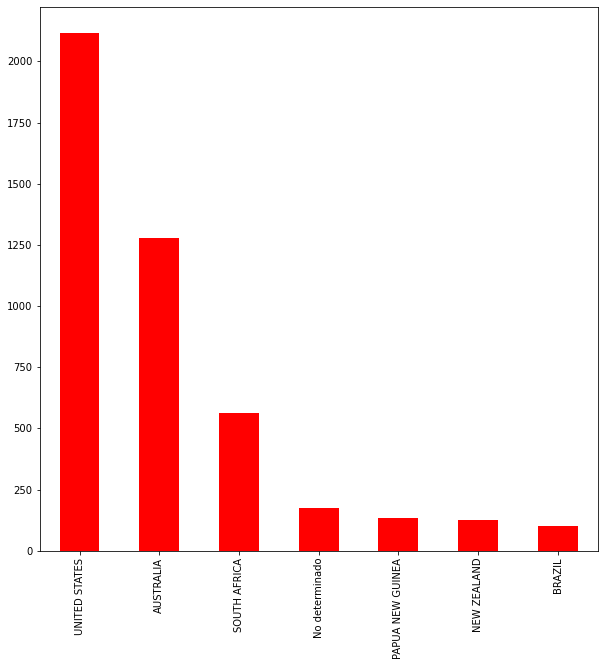

In [136]:
#Pais donde los tiburones son mas violentos
df.groupby("Country").filter(lambda x: len(x) > 100).Country.value_counts().plot.bar(color='red')

## ¿Que alimento prefieren los tiburones?

C:\Users\irazu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


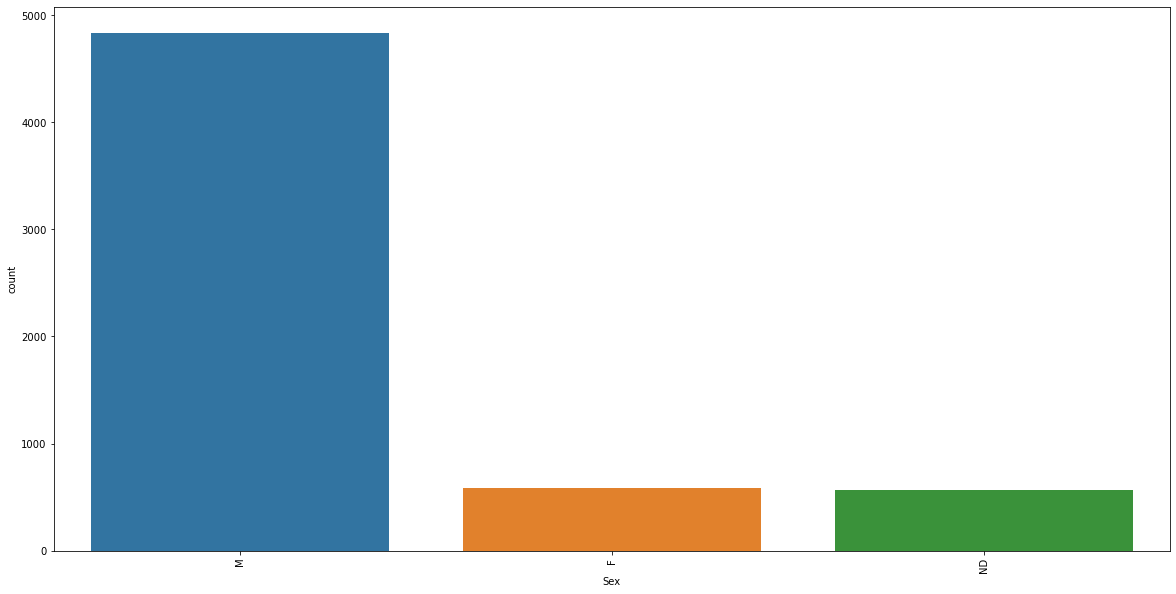

In [137]:
plt.figure(figsize=(20,10))
grafico = sns.countplot("Sex",  data = df, order = df["Sex"].value_counts().index)
grafico.tick_params(axis='x', rotation = 90)

# Cosas a mejorar

- Optimizar el codigo
- Tener mas rigor a la hora de eliminar o mantener datos
- O escribir todo en ingles o traducir todo a castellano DESDE EL PRINCIPIO


Caracteristicas de la presentacion: RISE

In [138]:
#Presentacion
from traitlets.config.manager import BaseJSONConfigManager
from pathlib import Path
path = Path.home() / ".jupyter" / "nbconfig"
cm = BaseJSONConfigManager(config_dir=str(path))
cm.update(
    "rise",
    {
        "header":"Proyecto Pandas",
        "theme": "moon",
        "transition": "linear",
        "start_slideshow_at": "selected",
        "slideNumber": "true"
     }
)

{'theme': 'moon',
 'transition': 'linear',
 'start_slideshow_at': 'selected',
 'autolaunch': True,
 'width': '100%',
 'height': '100%',
 'header': 'Proyecto Pandas',
 'footer': '',
 'scroll': True,
 'enable_chalkboard': True,
 'slideNumber': 'true',
 'center': False,
 'controlsLayout': 'edges',
 'hash': True}